In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
import xgboost as xgb


In [2]:
dataset = pd.read_csv('desktop/en_yeni_pre_mart.csv')
dataset

/Users/barankilic/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17,40,41,42,43,47,48,50,51,52,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount,cost_currency,total_cost_amount_in_tl,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km
0,ZK0BMR15,EUR,CANCELED,NaN,NaN,2022-02-25 08:13:28.903,2022-02-17 09:45:20.166,NaN,620e1914c6ac5460e59eb2b4,1700.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ankara_Essen,NaN
1,S2ON3IKO,TRY,DELIVERED,NaN,NaN,2022-03-02 21:13:51.289,2022-02-28 12:33:36.734,NaN,621cbb206a694311038625bd,397.000,...,765.09,TRY,765.09,49.36,55.23,765.09,49.36,55.23,İstanbul_Antalya,NaN
2,YX0LEDBY,TRY,DELIVERED,-,NaN,2022-02-28 16:34:50.185,2022-02-28 14:55:01.265,-,621ce232b282a66f326aea4c,10000.000,...,8000.00,TRY,8000.00,516.12,577.47,8000.00,516.12,577.47,Gaziantep_İstanbul,NaN
3,GLPTVKOW,TRY,DELIVERED,NaN,606ae737ad17691d3bdb3eba,2022-03-03 10:20:43.380,2022-02-28 14:04:40.109,0040878360,NaN,27.744,...,1572.00,TRY,1572.00,101.42,113.47,1572.00,101.42,113.47,Kocaeli_Bursa,NaN
4,JP610Q9M,TRY,DELIVERED,NaN,606ae737ad17691d3bdb3eba,2022-03-03 10:20:43.380,2022-02-28 14:04:40.286,0040867975,NaN,31.200,...,37.56,TRY,37.56,2.42,2.71,37.56,2.42,2.71,Kocaeli_Bursa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48376,6U2WWH09,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.440,NaN,5e8c5f5b76cad97764139545,448.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_İstanbul,1.0
48377,XJO652GC,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Bitlis,NaN
48378,0BOTO0G4,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Bayburt,NaN
48379,8GINZKBD,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Kayseri,NaN


In [3]:
price_data = pd.read_excel('desktop/shipment.xlsx',sheet_name = 'Sheet1')
price_data

,İl,İlçe,Tarih,kursunsuz_v_max,pro_dizel,V/MAX Dizel 10,Gazyağı,Kalorifer Yakıtı,%1 Kükürtlü Fuel Oil
0,İstanbul,BUYUKCEKMECE,2020-03-01,6.59 TL,6.2 TL,6.24 TL,5.1 TL,4 TL,3.93 TL
1,İstanbul,BUYUKCEKMECE,2020-03-03,6.59 TL,6.2 TL,6.24 TL,5.1 TL,3.95 TL,3.85 TL
2,İstanbul,BUYUKCEKMECE,2020-03-04,6.59 TL,6.2 TL,6.24 TL,5.1 TL,4.04 TL,3.94 TL
3,İstanbul,BUYUKCEKMECE,2020-03-10,6.59 TL,6.2 TL,6.24 TL,5.1 TL,3.67 TL,3.56 TL
4,İstanbul,BUYUKCEKMECE,2020-03-11,5.99 TL,5.65 TL,5.69 TL,4.47 TL,3.2 TL,3.06 TL
...,...,...,...,...,...,...,...,...,...
432,İstanbul,BUYUKCEKMECE,2022-03-09,20.35 TL,22.81 TL,22.84 TL,20.9 TL,18.91 TL,16.48 TL
433,İstanbul,BUYUKCEKMECE,2022-03-10,20.35 TL,22.81 TL,22.84 TL,22.95 TL,20.36 TL,17.38 TL
434,İstanbul,BUYUKCEKMECE,2022-03-11,20.38 TL,22.86 TL,22.89 TL,20.93 TL,19.06 TL,16.68 TL
435,İstanbul,BUYUKCEKMECE,2022-03-12,20.38 TL,22.86 TL,22.89 TL,18.65 TL,17.77 TL,16.24 TL


In [4]:
data = pd.concat([price_data.Tarih.astype(str), price_data.kursunsuz_v_max, price_data.pro_dizel], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tarih            437 non-null    object
 1   kursunsuz_v_max  437 non-null    object
 2   pro_dizel        437 non-null    object
dtypes: object(3)
memory usage: 10.4+ KB


In [5]:
dataset['Tarih']= dataset.pickup_start_date.str[:-13]
dataset['Tarih']

0        2022-02-28
1        2022-02-28
2        2022-02-28
3        2022-02-28
4        2022-02-28
            ...    
48376    2020-04-09
48377    2020-04-09
48378    2020-04-09
48379    2020-04-09
48380    2020-04-09
Name: Tarih, Length: 48381, dtype: object

In [6]:
inner_join = pd.merge(dataset, 
                      data, 
                      on ='Tarih', 
                      how ='inner')

In [7]:
inner_join

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
0,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,325.17,364.71,5200.0,325.17,364.71,Manisa_İstanbul,NaN,2022-02-26,16.77 TL,17 TL
1,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,325.17,364.71,5200.0,325.17,364.71,Manisa_İstanbul,NaN,2022-02-26,16.77 TL,17 TL
2,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,250.13,280.54,4000.0,250.13,280.54,Manisa_İstanbul,NaN,2022-02-26,16.77 TL,17 TL
3,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,250.13,280.54,4000.0,250.13,280.54,Manisa_İstanbul,NaN,2022-02-26,16.77 TL,17 TL
4,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.0,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77 TL,17 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28729,0BOTO0G4,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_Bayburt,NaN,2020-04-09,5.22 TL,5.45 TL
28730,8GINZKBD,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_Kayseri,NaN,2020-04-09,5.22 TL,5.45 TL
28731,8GINZKBD,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_Kayseri,NaN,2020-04-09,5.22 TL,5.45 TL
28732,0HIH977T,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.440,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_İstanbul,1.0,2020-04-09,5.22 TL,5.45 TL


In [8]:
inner_join['kursunsuz_v_max'] = inner_join['kursunsuz_v_max'].str[:-2]
inner_join['kursunsuz_v_max']

0        16.77 
1        16.77 
2        16.77 
3        16.77 
4        16.77 
          ...  
28729     5.22 
28730     5.22 
28731     5.22 
28732     5.22 
28733     5.22 
Name: kursunsuz_v_max, Length: 28734, dtype: object

In [9]:
inner_join['pro_dizel'] = inner_join['pro_dizel'].str[:-2]
inner_join['pro_dizel']

0          17 
1          17 
2          17 
3          17 
4          17 
         ...  
28729    5.45 
28730    5.45 
28731    5.45 
28732    5.45 
28733    5.45 
Name: pro_dizel, Length: 28734, dtype: object

In [10]:
inner_join['pro_dizel'] = inner_join.pro_dizel.astype(float)
inner_join.kursunsuz_v_max = inner_join.kursunsuz_v_max.astype(float)
inner_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28734 entries, 0 to 28733
Data columns (total 92 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          28734 non-null  object 
 1   value_currency                              28734 non-null  object 
 2   latest_status                               28734 non-null  object 
 3   shipper_note                                3218 non-null   object 
 4   updatedby                                   22662 non-null  object 
 5   updatedat                                   28734 non-null  object 
 6   createdat                                   28734 non-null  object 
 7   order_id                                    10066 non-null  object 
 8   pricing_id                                  19740 non-null  object 
 9   totalkgds                                   28734 non-null  float64
 10  pickup_sta

In [11]:
dataset = inner_join
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
0,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,325.17,364.71,5200.0,325.17,364.71,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
1,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,325.17,364.71,5200.0,325.17,364.71,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
2,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,250.13,280.54,4000.0,250.13,280.54,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
3,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,250.13,280.54,4000.0,250.13,280.54,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
4,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.0,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28729,0BOTO0G4,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_Bayburt,NaN,2020-04-09,5.22,5.45
28730,8GINZKBD,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_Kayseri,NaN,2020-04-09,5.22,5.45
28731,8GINZKBD,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_Kayseri,NaN,2020-04-09,5.22,5.45
28732,0HIH977T,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.440,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,NaN,NaN,NaN,İstanbul_İstanbul,1.0,2020-04-09,5.22,5.45


In [12]:
dataset = dataset[dataset.total_cost_amount_in_tl > 10]
#dataset = dataset[dataset.total_cost_amount_in_tl < 10000]

In [13]:
# Get Delivered Shipments
accepted = ('APPROVED', 'IN_TRANSIT', 'IN_DELIVERY', 'IN_CROSSDOCK', 'DELIVERED', 'IN_PICKUP')

dataset = dataset[dataset.latest_status.isin(accepted)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
0,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,325.17,364.71,5200.00,325.17,364.71,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
1,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,325.17,364.71,5200.00,325.17,364.71,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
2,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,250.13,280.54,4000.00,250.13,280.54,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
3,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,250.13,280.54,4000.00,250.13,280.54,Manisa_İstanbul,NaN,2022-02-26,16.77,17.00
4,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.00,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25867,9SW0FTNN,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:40.770,2021-01-14 19:48:45.133,NaN,60009fbe49885878b863095f,480.0,...,6.09,7.27,62.77,6.09,7.27,Kocaeli_İzmir,461.8,2021-01-14,7.20,6.59
25870,A437BSLV,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:52.342,2021-01-14 19:48:45.153,NaN,60009fbe49885878b863095f,480.0,...,6.09,7.27,62.77,6.09,7.27,Kocaeli_İzmir,461.8,2021-01-14,7.20,6.59
25871,A437BSLV,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:52.342,2021-01-14 19:48:45.153,NaN,60009fbe49885878b863095f,480.0,...,6.09,7.27,62.77,6.09,7.27,Kocaeli_İzmir,461.8,2021-01-14,7.20,6.59
26286,7B67CBV5,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:32:01.175,2020-12-29 07:58:12.796,NaN,5feae18db973bb2a9e4fa09e,720.0,...,28.63,34.87,300.00,28.63,34.87,İstanbul_Yalova,NaN,2020-12-29,7.18,6.57


In [14]:
# GET pickup and dropoffs
routes = ('Bursa_Kocaeli', 'İzmir_Balıkesir', 'Konya_Afyonkarahisar', 'Afyonkarahisar_Afyonkarahisar', 'Kocaeli_Kocaeli', 'Bursa_Bursa', 'Bursa_Balıkesir', 'Kocaeli_Erzurum','Balıkesir_Balıkesir','İstanbul_İstanbul','Kocaeli_İstanbul','Kayseri_Afyonkarahisar','İstanbul_İzmir','Burdur_Bolu','Kocaeli_Malatya','Manisa_Balıkesir','İstanbul_Kocaeli','Balıkesir_Bursa','Hatay_Osmaniye','Kocaeli_İzmir','Sakarya_Kocaeli','İstanbul_Ankara','Bursa_Kayseri','Bursa_İstanbul','Bursa_İzmir', 'Yozgat_Afyonkarahisar', 'Bursa_Afyonkarahisar','İzmir_Afyonkarahisar', 'Bitlis_Afyonkarahisar','Sivas_Afyonkarahisar')
#routes = (['İstanbul_İstanbul'])
dataset = dataset[dataset.routes.isin(routes)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
4,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.00,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
5,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.00,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
6,6S0LETNH,TRY,DELIVERED,NaN,NaN,2022-02-27 19:47:15.280,2022-02-25 12:13:07.325,NaN,6218c7d260db324ef06b4be1,15000.0,...,75.04,84.16,1200.00,75.04,84.16,İstanbul_İstanbul,1.0,2022-02-26,16.77,17.00
7,6S0LETNH,TRY,DELIVERED,NaN,NaN,2022-02-27 19:47:15.280,2022-02-25 12:13:07.325,NaN,6218c7d260db324ef06b4be1,15000.0,...,75.04,84.16,1200.00,75.04,84.16,İstanbul_İstanbul,1.0,2022-02-26,16.77,17.00
14,OBTL48W8,TRY,DELIVERED,NaN,NaN,2022-02-25 14:27:07.789,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.00,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24935,VE6UGOBR,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:56:20.245,2021-02-26 13:54:38.942,NaN,6038fd9ad4c3a94d37ec7bd8,19800.0,...,151.10,183.15,1500.00,151.10,183.15,İstanbul_İstanbul,1.0,2021-02-26,7.21,6.60
25866,9SW0FTNN,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:40.770,2021-01-14 19:48:45.133,NaN,60009fbe49885878b863095f,480.0,...,6.09,7.27,62.77,6.09,7.27,Kocaeli_İzmir,461.8,2021-01-14,7.20,6.59
25867,9SW0FTNN,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:40.770,2021-01-14 19:48:45.133,NaN,60009fbe49885878b863095f,480.0,...,6.09,7.27,62.77,6.09,7.27,Kocaeli_İzmir,461.8,2021-01-14,7.20,6.59
25870,A437BSLV,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:52.342,2021-01-14 19:48:45.153,NaN,60009fbe49885878b863095f,480.0,...,6.09,7.27,62.77,6.09,7.27,Kocaeli_İzmir,461.8,2021-01-14,7.20,6.59


In [15]:
#Split Data by Shipment Type
dataset = dataset[dataset.shipment_type == 'FTL']
orj_data = dataset
dataset


,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
4,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.0,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
5,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.0,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
6,6S0LETNH,TRY,DELIVERED,NaN,NaN,2022-02-27 19:47:15.280,2022-02-25 12:13:07.325,NaN,6218c7d260db324ef06b4be1,15000.0,...,75.04,84.16,1200.0,75.04,84.16,İstanbul_İstanbul,1.0,2022-02-26,16.77,17.00
7,6S0LETNH,TRY,DELIVERED,NaN,NaN,2022-02-27 19:47:15.280,2022-02-25 12:13:07.325,NaN,6218c7d260db324ef06b4be1,15000.0,...,75.04,84.16,1200.0,75.04,84.16,İstanbul_İstanbul,1.0,2022-02-26,16.77,17.00
14,OBTL48W8,TRY,DELIVERED,NaN,NaN,2022-02-25 14:27:07.789,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,375.20,420.82,6000.0,375.20,420.82,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,S59VBYA6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:51:04.795,2021-05-19 11:09:45.548,NaN,60a4f1f7a4eb0c0c6dcc40df,1000.0,...,54.00,65.92,0.0,0.00,0.00,Kocaeli_İstanbul,94.1,2021-05-12,7.07,6.43
21930,38E131PT,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:29:07.350,2021-05-19 11:05:16.868,NaN,60a4f0eaa4eb0c0c6dcc40da,1000.0,...,54.00,65.92,550.0,54.00,65.92,Kocaeli_İstanbul,94.1,2021-05-07,7.07,6.43
21931,38E131PT,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:29:07.350,2021-05-19 11:05:16.868,NaN,60a4f0eaa4eb0c0c6dcc40da,1000.0,...,54.00,65.92,550.0,54.00,65.92,Kocaeli_İstanbul,94.1,2021-05-07,7.07,6.43
21994,WRSO6RD9,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:57:14.235,2021-05-19 11:06:14.385,NaN,60a4f123a4eb0c0c6dcc40db,1000.0,...,58.91,71.92,600.0,58.91,71.92,Kocaeli_İstanbul,94.1,2021-05-07,7.07,6.43


In [16]:
# Get Applicable Columns
dataset = pd.concat([dataset['latest_status'],dataset['totalkgds'],dataset['pickup_city'],dataset['dropoff_city'] ,dataset['pickup_address_type'], dataset['dropoff_address_type'],
                  dataset['category'], dataset['price_type'], 
                  dataset['shipment_type'], dataset['vehicle_type'],dataset['vehicle_body_type'],
                  dataset['vehicle_package_type'], dataset['vehicle_way_of_loading'],
                  dataset['vehicle_tonnage_per_vehicle'],dataset['payment_option'],
                  dataset['invoice_type'], dataset['tenant_signup_flow'], 
                  dataset['total_trip_cost_amount_in_tl'], dataset['usd_tl'],
                  dataset['price_base_amount_in_tl']
                 ,dataset['routes'], dataset['km'],dataset['kursunsuz_v_max'],dataset['pro_dizel']], axis = 1)
dataset

,latest_status,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,price_type,shipment_type,vehicle_type,...,payment_option,invoice_type,tenant_signup_flow,total_trip_cost_amount_in_tl,usd_tl,price_base_amount_in_tl,routes,km,kursunsuz_v_max,pro_dizel
4,DELIVERED,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,6000.0,14.2580,6476.0,Burdur_Bolu,566.4,16.77,17.00
5,DELIVERED,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,6000.0,14.2580,6476.0,Burdur_Bolu,566.4,16.77,17.00
6,DELIVERED,15000.0,İstanbul,İstanbul,FACTORY,OTHER,CHEMICAL,MANUAL,FTL,_10_WHEELER,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,1200.0,14.2580,1450.0,İstanbul_İstanbul,1.0,16.77,17.00
7,DELIVERED,15000.0,İstanbul,İstanbul,FACTORY,OTHER,CHEMICAL,MANUAL,FTL,_10_WHEELER,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,1200.0,14.2580,1450.0,İstanbul_İstanbul,1.0,16.77,17.00
14,DELIVERED,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,6000.0,14.2580,6476.0,Burdur_Bolu,566.4,16.77,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,DELIVERED,1000.0,Kocaeli,İstanbul,FACTORY,OTHER,BUILD,NaN,FTL,OTHER,...,PAY_LATER,NaN,SELF_SIGNUP,0.0,8.3016,505.0,Kocaeli_İstanbul,94.1,7.07,6.43
21930,DELIVERED,1000.0,Kocaeli,İstanbul,FACTORY,OTHER,BUILD,NaN,FTL,OTHER,...,PAY_LATER,NaN,SELF_SIGNUP,550.0,8.3211,505.0,Kocaeli_İstanbul,94.1,7.07,6.43
21931,DELIVERED,1000.0,Kocaeli,İstanbul,FACTORY,OTHER,BUILD,NaN,FTL,OTHER,...,PAY_LATER,NaN,SELF_SIGNUP,550.0,8.3211,505.0,Kocaeli_İstanbul,94.1,7.07,6.43
21994,DELIVERED,1000.0,Kocaeli,İstanbul,FACTORY,OTHER,BUILD,NaN,FTL,OTHER,...,PAY_LATER,NaN,SELF_SIGNUP,600.0,8.3211,505.0,Kocaeli_İstanbul,94.1,7.07,6.43


In [17]:
dataset = dataset.drop(columns = 'shipment_type')
dataset = dataset.drop(columns = 'latest_status')
dataset = dataset.drop(columns = 'price_base_amount_in_tl')
dataset = dataset.drop(columns = 'price_type')
dataset = dataset.drop(columns = 'payment_option')
dataset = dataset.drop(columns = 'invoice_type')
dataset = dataset.drop(columns = 'tenant_signup_flow')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4662 entries, 4 to 21995
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   totalkgds                     4662 non-null   float64
 1   pickup_city                   4662 non-null   object 
 2   dropoff_city                  4662 non-null   object 
 3   pickup_address_type           4662 non-null   object 
 4   dropoff_address_type          4662 non-null   object 
 5   category                      4662 non-null   object 
 6   vehicle_type                  4662 non-null   object 
 7   vehicle_body_type             4662 non-null   object 
 8   vehicle_package_type          4636 non-null   object 
 9   vehicle_way_of_loading        4662 non-null   object 
 10  vehicle_tonnage_per_vehicle   4662 non-null   float64
 11  total_trip_cost_amount_in_tl  4662 non-null   float64
 12  usd_tl                        4662 non-null   float64
 13  ro

In [18]:
labelencoder = LabelEncoder()
dataset['category'] = labelencoder.fit_transform(dataset['category'])
dataset['vehicle_type'] = labelencoder.fit_transform(dataset['vehicle_type'])
dataset['vehicle_body_type'] = labelencoder.fit_transform(dataset['vehicle_body_type'])
dataset['vehicle_package_type'] = labelencoder.fit_transform(dataset['vehicle_package_type'])
dataset['vehicle_way_of_loading'] = labelencoder.fit_transform(dataset['vehicle_way_of_loading'])
dataset['pickup_address_type'] = labelencoder.fit_transform(dataset['pickup_address_type'])
dataset['dropoff_address_type'] = labelencoder.fit_transform(dataset['dropoff_address_type'])
dataset['routes'] = labelencoder.fit_transform(dataset['routes'])
dataset['pickup_city'] = labelencoder.fit_transform(dataset['pickup_city'])
dataset['dropoff_city'] = labelencoder.fit_transform(dataset['dropoff_city'])


dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4662 entries, 4 to 21995
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   totalkgds                     4662 non-null   float64
 1   pickup_city                   4662 non-null   int64  
 2   dropoff_city                  4662 non-null   int64  
 3   pickup_address_type           4662 non-null   int64  
 4   dropoff_address_type          4662 non-null   int64  
 5   category                      4662 non-null   int64  
 6   vehicle_type                  4662 non-null   int64  
 7   vehicle_body_type             4662 non-null   int64  
 8   vehicle_package_type          4662 non-null   int64  
 9   vehicle_way_of_loading        4662 non-null   int64  
 10  vehicle_tonnage_per_vehicle   4662 non-null   float64
 11  total_trip_cost_amount_in_tl  4662 non-null   float64
 12  usd_tl                        4662 non-null   float64
 13  ro

In [19]:
max(dataset['total_trip_cost_amount_in_tl'])

13850.0

In [20]:
dataset['km_fuel'] = dataset.km*dataset.kursunsuz_v_max

In [21]:
drops = [ 'vehicle_tonnage_per_vehicle','vehicle_way_of_loading','dropoff_address_type','category','pickup_address_type','pro_dizel','routes','usd_tl','vehicle_type','pickup_city','dropoff_city']
dataset = dataset.drop(columns = drops)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'total_trip_cost_amount_in_tl'), dataset.total_trip_cost_amount_in_tl, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((3263, 6), (1399, 6))

In [23]:
model = xgb.XGBRegressor(eta = 0.121)

In [24]:
train = xgb.DMatrix(X_train, label = y_train )
test  = xgb.DMatrix(X_test, label = y_test)

In [25]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.121, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.120999999,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [26]:
y_pred = model.predict(X_train)

In [27]:
metrics.r2_score(y_train,y_pred)

0.9850449333652652

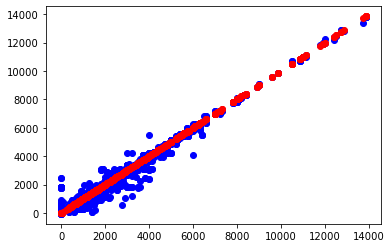

In [28]:
plt.scatter(y_train,y_pred,color='blue',label='Prediction')
plt.scatter(y_train,y_train,color='red',label='Perfect prediction')

In [29]:
metrics.mean_absolute_error(y_train,y_pred)

135.98814017887022

In [30]:
predictions = model.predict(X_test)

In [31]:
metrics.r2_score(predictions,y_test)

0.9815756705384014

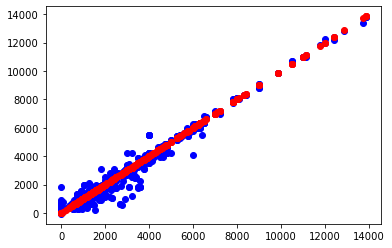

In [32]:
plt.scatter(y_test,predictions,color='blue',label='Prediction')
plt.scatter(y_test,y_test,color='red',label='Perfect prediction')

In [33]:
metrics.mean_absolute_error(predictions,y_test)

150.99183371670506

In [34]:
X_train.columns

Index(['totalkgds', 'vehicle_body_type', 'vehicle_package_type', 'km',
       'kursunsuz_v_max', 'km_fuel'],
      dtype='object')

In [35]:
model.feature_importances_

array([0.04608857, 0.01390738, 0.01274681, 0.37128493, 0.03452184,
       0.52145046], dtype=float32)

In [36]:
mart_data = pd.read_csv('desktop/after_mart.csv')
mart_data

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount,cost_currency,total_cost_amount_in_tl,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km
0,PS6AP2DU,EUR,CANCELED,NaN,NaN,2022-02-11 11:14:41.602,2022-02-11 11:10:22.380,NaN,620643c46ecc56658317d86a,465.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin,NaN
1,TC0KXIOZ,TRY,CANCELED,NaN,NaN,2022-02-17 13:55:37.242,2022-02-14 09:19:45.624,NaN,620a1e7a9fa329591220165a,5907.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Antalya,NaN
2,V1XPTCKS,TRY,APPROVED,NaN,NaN,2022-03-22 14:36:17.740,2022-03-22 14:35:15.290,NaN,6239dea04849697c6e0395e3,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mersin_Styria,NaN
3,5IYFNPZI,TRY,APPROVED,NaN,NaN,2022-03-22 15:01:34.210,2022-03-22 14:34:22.388,NaN,6239de3f4849697c6e0395e2,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mersin_İstanbul,NaN
4,4SG39B9V,TRY,APPROVED,5 palet ürünün bir kısmı sıvı sabun içermekte ...,NaN,2022-03-22 08:01:37.467,2022-03-22 08:01:37.467,NaN,6239826086b3135181bfed3f,4480.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Budapest,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,0E8F7OJA,TRY,DELIVERED,NaN,NaN,2022-03-01 06:19:46.626,2022-02-28 15:08:22.575,NaN,621ce56566f1f50b18a4c192,15000.00,...,1200.0,TRY,1200.0,77.00,86.27,1200.0,77.00,86.27,İstanbul_İstanbul,1.0
2970,72O60VFO,TRY,DELIVERED,NaN,NaN,2022-03-01 18:05:48.553,2022-02-28 14:25:43.604,NaN,621cdb6666f1f50b18a4c18f,15000.00,...,1200.0,TRY,1200.0,77.42,86.62,1200.0,77.42,86.62,İstanbul_İstanbul,1.0
2971,FVTWO3H9,TRY,DELIVERED,NaN,NaN,2022-03-01 19:14:49.124,2022-02-28 18:55:53.268,NaN,621d1aad9e374a5f4f4d69ff,7500.00,...,900.0,TRY,900.0,57.75,64.70,900.0,57.75,64.70,İstanbul_İstanbul,1.0
2972,L3J3ZFRU,TRY,CANCELED,NaN,NaN,2022-03-01 08:57:17.675,2022-03-01 08:47:28.507,NaN,621ddd9933905c2549688408,384.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_İstanbul,1.0


In [37]:
mart_data['Tarih']= mart_data.pickup_start_date.str[:-13]
mart_data['Tarih']

0       2022-04-08
1       2022-04-01
2       2022-03-25
3       2022-03-25
4       2022-03-25
           ...    
2969    2022-03-01
2970    2022-03-01
2971    2022-03-01
2972    2022-03-01
2973    2022-03-01
Name: Tarih, Length: 2974, dtype: object

In [38]:
mart_inner_join = pd.merge(mart_data, 
                      data, 
                      on ='Tarih', 
                      how ='inner')
mart_inner_join

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
0,2GTL83V7,TRY,DELIVERED,NaN,NaN,2022-03-16 14:48:16.970,2022-03-15 13:45:37.402,5183271464,NaN,800.000,...,61.04,67.12,991.75,61.04,67.12,İstanbul_Bursa,NaN,2022-03-15,20.38 TL,20.61 TL
1,2GTL83V7,TRY,DELIVERED,NaN,NaN,2022-03-16 14:48:16.970,2022-03-15 13:45:37.402,5183271464,NaN,800.000,...,61.04,67.12,991.75,61.04,67.12,İstanbul_Bursa,NaN,2022-03-15,20.38 TL,20.61 TL
2,RG7WFKCL,TRY,DELIVERED,NaN,6213538de796e1460f92ab00,2022-03-22 11:21:48.734,2022-03-15 14:08:18.857,0040905679,NaN,18.864,...,1.37,1.51,22.32,1.37,1.51,Kocaeli_Bursa,NaN,2022-03-15,20.38 TL,20.61 TL
3,RG7WFKCL,TRY,DELIVERED,NaN,6213538de796e1460f92ab00,2022-03-22 11:21:48.734,2022-03-15 14:08:18.857,0040905679,NaN,18.864,...,1.37,1.51,22.32,1.37,1.51,Kocaeli_Bursa,NaN,2022-03-15,20.38 TL,20.61 TL
4,EWOKU7MY,TRY,DELIVERED,NaN,6213538de796e1460f92ab00,2022-03-22 11:21:48.734,2022-03-15 14:08:18.757,0040919088,NaN,40.800,...,0.02,0.03,0.37,0.02,0.03,Kocaeli_İstanbul,94.1,2022-03-15,20.38 TL,20.61 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,FVTWO3H9,TRY,DELIVERED,NaN,NaN,2022-03-01 19:14:49.124,2022-02-28 18:55:53.268,NaN,621d1aad9e374a5f4f4d69ff,7500.000,...,57.75,64.70,900.00,57.75,64.70,İstanbul_İstanbul,1.0,2022-03-01,16.53 TL,16.05 TL
2956,L3J3ZFRU,TRY,CANCELED,NaN,NaN,2022-03-01 08:57:17.675,2022-03-01 08:47:28.507,NaN,621ddd9933905c2549688408,384.000,...,NaN,NaN,NaN,NaN,NaN,İstanbul_İstanbul,1.0,2022-03-01,16.53 TL,16.05 TL
2957,L3J3ZFRU,TRY,CANCELED,NaN,NaN,2022-03-01 08:57:17.675,2022-03-01 08:47:28.507,NaN,621ddd9933905c2549688408,384.000,...,NaN,NaN,NaN,NaN,NaN,İstanbul_İstanbul,1.0,2022-03-01,16.53 TL,16.05 TL
2958,G2KKG2FL,TRY,CANCELED,Tenteli kayar çatılı araç olmalı.,NaN,2022-03-01 07:04:37.679,2022-02-28 14:53:34.256,Y22-2427,621ce1ed66f1f50b18a4c190,26000.000,...,NaN,NaN,NaN,NaN,NaN,Kocaeli_Kütahya,NaN,2022-03-01,16.53 TL,16.05 TL


In [39]:
mart_inner_join=mart_inner_join.groupby('id').max()

In [40]:
mart_inner_join['kursunsuz_v_max'] = mart_inner_join['kursunsuz_v_max'].str[:-2]
mart_inner_join['kursunsuz_v_max']

id
01KA9MCP    17.42 
02DTUCYM    16.53 
02NQTAU5    20.38 
031ZJED9    17.42 
03WIAQH4    20.38 
             ...  
ZTWDFMCA    20.35 
ZTX5RTA2    16.53 
ZUYO3G05    20.38 
ZY2K6IS4    17.98 
ZYK4WYU8    16.53 
Name: kursunsuz_v_max, Length: 1480, dtype: object

In [41]:
mart_inner_join['pro_dizel'] = mart_inner_join['pro_dizel'].str[:-2]
mart_inner_join['pro_dizel']

id
01KA9MCP    17.56 
02DTUCYM    16.05 
02NQTAU5    22.86 
031ZJED9    17.56 
03WIAQH4    22.86 
             ...  
ZTWDFMCA    22.81 
ZTX5RTA2    16.05 
ZUYO3G05    22.86 
ZY2K6IS4    18.92 
ZYK4WYU8    16.06 
Name: pro_dizel, Length: 1480, dtype: object

In [42]:
mart_inner_join['pro_dizel'] = mart_inner_join.pro_dizel.astype(float)
mart_inner_join.kursunsuz_v_max = mart_inner_join.kursunsuz_v_max.astype(float)
mart_inner_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 01KA9MCP to ZYK4WYU8
Data columns (total 91 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   value_currency                              1480 non-null   object 
 1   latest_status                               1480 non-null   object 
 2   shipper_note                                194 non-null    object 
 3   updatedby                                   246 non-null    object 
 4   updatedat                                   1480 non-null   object 
 5   createdat                                   1480 non-null   object 
 6   order_id                                    761 non-null    object 
 7   pricing_id                                  779 non-null    object 
 8   totalkgds                                   1480 non-null   float64
 9   pickup_start_date                           1480 non-null   object 
 10  pickup

In [43]:
mart_data = mart_inner_join
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
01KA9MCP,TRY,DELIVERED,NaN,NaN,2022-03-05 12:15:58.147,2022-03-02 13:55:28.290,NaN,621f774fe8037570c4cc4888,8000.00,2022-03-03 05:00:00.000,...,480.74,533.28,7500.00,480.74,533.28,Kocaeli_Mersin,NaN,2022-03-03,17.42,17.56
02DTUCYM,TRY,DELIVERED,NaN,61485fe9ef31ce19fc2cc0da,2022-03-09 10:51:39.465,2022-03-01 14:25:27.347,0040873083,NaN,1.80,2022-03-01 11:00:00.000,...,0.11,0.12,1.65,0.11,0.12,Kocaeli_Bursa,NaN,2022-03-01,16.53,16.05
02NQTAU5,TRY,DELIVERED,NaN,NaN,2022-03-15 06:15:01.540,2022-03-10 11:38:40.446,NaN,NaN,576.00,2022-03-11 06:00:00.000,...,33.12,36.58,540.33,33.12,36.58,Kocaeli_Ankara,NaN,2022-03-11,20.38,22.86
031ZJED9,TRY,CANCELED,Onay alınarak ilerlenecek,NaN,2022-03-04 06:51:33.313,2022-03-03 06:41:16.737,NaN,6220630382bdd701ade7f39b,19000.00,2022-03-03 06:00:00.000,...,NaN,NaN,NaN,NaN,NaN,Ankara_Sakarya,NaN,2022-03-03,17.42,17.56
03WIAQH4,TRY,CANCELED,NaN,NaN,2022-03-07 10:07:08.634,2022-03-07 10:06:01.191,NaN,6225d907ed4bd061b222275b,24000.00,2022-03-12 06:00:00.000,...,NaN,NaN,NaN,NaN,NaN,Mersin_Styria,NaN,2022-03-12,20.38,22.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTWDFMCA,TRY,IN_TRANSIT,NaN,NaN,2022-03-11 07:54:18.213,2022-03-10 08:37:32.940,NaN,6229b8c9f75a5700ad5111f7,5000.00,2022-03-10 06:00:00.000,...,NaN,NaN,NaN,NaN,NaN,Kocaeli_Antalya,NaN,2022-03-10,20.35,22.81
ZTX5RTA2,TRY,DELIVERED,NaN,61485fe9ef31ce19fc2cc0da,2022-03-09 10:51:39.465,2022-03-01 14:25:27.628,0040876608,NaN,33.48,2022-03-01 11:00:00.000,...,0.02,0.02,0.28,0.02,0.02,Kocaeli_İstanbul,94.1,2022-03-01,16.53,16.05
ZUYO3G05,TRY,CANCELED,NaN,NaN,2022-03-07 10:07:08.634,2022-03-07 10:06:01.191,NaN,6225d907ed4bd061b222275b,24000.00,2022-03-12 06:00:00.000,...,NaN,NaN,NaN,NaN,NaN,Mersin_Styria,NaN,2022-03-12,20.38,22.86


In [44]:
mart_data = mart_data[mart_data.total_cost_amount_in_tl > 10]
mart_data = mart_data[mart_data.total_cost_amount_in_tl < 15000]

mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
01KA9MCP,TRY,DELIVERED,NaN,NaN,2022-03-05 12:15:58.147,2022-03-02 13:55:28.290,NaN,621f774fe8037570c4cc4888,8000.0,2022-03-03 05:00:00.000,...,480.74,533.28,7500.00,480.74,533.28,Kocaeli_Mersin,NaN,2022-03-03,17.42,17.56
02NQTAU5,TRY,DELIVERED,NaN,NaN,2022-03-15 06:15:01.540,2022-03-10 11:38:40.446,NaN,NaN,576.0,2022-03-11 06:00:00.000,...,33.12,36.58,540.33,33.12,36.58,Kocaeli_Ankara,NaN,2022-03-11,20.38,22.86
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,430.87,473.71,7000.00,430.87,473.71,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,149.87,166.23,2350.00,149.87,166.23,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
06P191MS,TRY,DELIVERED,NaN,NaN,2022-03-08 14:36:10.718,2022-03-08 14:31:19.463,NaN,NaN,576.0,2022-03-09 06:00:00.000,...,20.17,21.95,318.25,20.17,21.95,Kocaeli_Manisa,NaN,2022-03-09,20.35,22.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZQAVOC2C,TRY,DELIVERED,ADANA UĞRAMA,NaN,2022-03-01 07:44:54.157,2022-03-01 06:57:57.343,NaN,621dc3efa982ab546511fb6b,10000.0,2022-03-01 06:00:00.000,...,545.45,611.05,8500.00,545.45,611.05,Kocaeli_Gaziantep,NaN,2022-03-01,16.53,16.05
ZRQPTNI7,TRY,DELIVERED,--,NaN,2022-03-15 19:18:13.826,2022-03-15 15:03:22.206,-,6230aaae313dee7ca5ecde8e,10000.0,2022-03-15 11:00:00.000,...,387.78,426.34,6300.00,387.78,426.34,İstanbul_İzmir,479.0,2022-03-15,20.38,20.61
ZSIQN046,TRY,DELIVERED,NaN,NaN,2022-03-18 06:12:08.242,2022-03-15 12:33:43.560,5100245259,NaN,2323.2,2022-03-15 06:00:00.000,...,266.29,292.62,4304.09,266.29,292.62,İstanbul_Bursa,NaN,2022-03-15,20.38,20.61


In [45]:
# Get Delivered Shipments
accepted = (['DELIVERED'])

mart_data = mart_data[mart_data.latest_status.isin(accepted)]
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
01KA9MCP,TRY,DELIVERED,NaN,NaN,2022-03-05 12:15:58.147,2022-03-02 13:55:28.290,NaN,621f774fe8037570c4cc4888,8000.0,2022-03-03 05:00:00.000,...,480.74,533.28,7500.00,480.74,533.28,Kocaeli_Mersin,NaN,2022-03-03,17.42,17.56
02NQTAU5,TRY,DELIVERED,NaN,NaN,2022-03-15 06:15:01.540,2022-03-10 11:38:40.446,NaN,NaN,576.0,2022-03-11 06:00:00.000,...,33.12,36.58,540.33,33.12,36.58,Kocaeli_Ankara,NaN,2022-03-11,20.38,22.86
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,430.87,473.71,7000.00,430.87,473.71,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,149.87,166.23,2350.00,149.87,166.23,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
06P191MS,TRY,DELIVERED,NaN,NaN,2022-03-08 14:36:10.718,2022-03-08 14:31:19.463,NaN,NaN,576.0,2022-03-09 06:00:00.000,...,20.17,21.95,318.25,20.17,21.95,Kocaeli_Manisa,NaN,2022-03-09,20.35,22.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZQAVOC2C,TRY,DELIVERED,ADANA UĞRAMA,NaN,2022-03-01 07:44:54.157,2022-03-01 06:57:57.343,NaN,621dc3efa982ab546511fb6b,10000.0,2022-03-01 06:00:00.000,...,545.45,611.05,8500.00,545.45,611.05,Kocaeli_Gaziantep,NaN,2022-03-01,16.53,16.05
ZRQPTNI7,TRY,DELIVERED,--,NaN,2022-03-15 19:18:13.826,2022-03-15 15:03:22.206,-,6230aaae313dee7ca5ecde8e,10000.0,2022-03-15 11:00:00.000,...,387.78,426.34,6300.00,387.78,426.34,İstanbul_İzmir,479.0,2022-03-15,20.38,20.61
ZSIQN046,TRY,DELIVERED,NaN,NaN,2022-03-18 06:12:08.242,2022-03-15 12:33:43.560,5100245259,NaN,2323.2,2022-03-15 06:00:00.000,...,266.29,292.62,4304.09,266.29,292.62,İstanbul_Bursa,NaN,2022-03-15,20.38,20.61


In [46]:
mart_data = mart_data[mart_data.routes.isin(routes)]
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,430.87,473.71,7000.00,430.87,473.71,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,149.87,166.23,2350.00,149.87,166.23,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
08WH8WLP,TRY,DELIVERED,NaN,NaN,2022-03-05 21:16:07.408,2022-03-05 06:27:48.366,NaN,622302d8d6e9721bd113bfc6,25000.0,2022-03-05 06:00:00.000,...,153.06,169.76,2400.00,153.06,169.76,Bursa_Kocaeli,132.4,2022-03-05,18.69,19.77
08XFCSA4,TRY,DELIVERED,NaN,NaN,2022-03-12 05:32:31.456,2022-03-11 06:34:30.399,NaN,622aed6e8d60f94ffb9b33be,25000.0,2022-03-11 11:00:00.000,...,159.38,176.03,2600.00,159.38,176.03,Bursa_Kocaeli,132.4,2022-03-11,20.38,22.86
09XVIHN0,TRY,DELIVERED,NaN,NaN,2022-03-10 19:34:44.158,2022-03-03 12:43:53.800,5100244865,NaN,432.0,2022-03-03 06:00:00.000,...,52.25,57.95,819.28,52.25,57.95,İstanbul_İzmir,479.0,2022-03-03,17.42,17.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNP212WL,TRY,DELIVERED,NaN,NaN,2022-03-09 15:43:03.850,2022-03-04 14:02:03.414,5183253875,NaN,160.0,2022-03-04 11:00:00.000,...,7.52,8.34,117.82,7.52,8.34,İstanbul_Ankara,443.9,2022-03-04,17.98,18.92
ZO9T1PZZ,TRY,DELIVERED,"11257051901,11257051902",NaN,2022-03-10 14:28:55.380,2022-03-10 07:43:46.282,"11257051901,11257051902",6229ac23c8d15c2990644120,480.0,2022-03-10 06:00:00.000,...,28.20,31.14,460.00,28.20,31.14,Kocaeli_İzmir,461.8,2022-03-10,20.35,22.81
ZOMSK235,TRY,DELIVERED,NaN,NaN,2022-03-09 15:43:03.850,2022-03-02 06:54:35.178,5183248527,NaN,224.0,2022-03-02 11:00:00.000,...,3.54,3.93,55.24,3.54,3.93,İstanbul_İzmir,479.0,2022-03-02,16.53,16.06


In [47]:
#Split Data by Shipment Type
mart_data = mart_data[mart_data.shipment_type == 'FTL']
orj_mart_data = mart_data
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,total_cost_amount_in_eur,total_cost_amount_in_usd,total_trip_cost_amount_in_tl,total_trip_cost_amount_in_eur,total_trip_cost_amount_in_usd,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,430.87,473.71,7000.0,430.87,473.71,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,149.87,166.23,2350.0,149.87,166.23,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
08WH8WLP,TRY,DELIVERED,NaN,NaN,2022-03-05 21:16:07.408,2022-03-05 06:27:48.366,NaN,622302d8d6e9721bd113bfc6,25000.0,2022-03-05 06:00:00.000,...,153.06,169.76,2400.0,153.06,169.76,Bursa_Kocaeli,132.4,2022-03-05,18.69,19.77
08XFCSA4,TRY,DELIVERED,NaN,NaN,2022-03-12 05:32:31.456,2022-03-11 06:34:30.399,NaN,622aed6e8d60f94ffb9b33be,25000.0,2022-03-11 11:00:00.000,...,159.38,176.03,2600.0,159.38,176.03,Bursa_Kocaeli,132.4,2022-03-11,20.38,22.86
0A2OCHU5,TRY,DELIVERED,NaN,NaN,2022-03-15 15:00:30.193,2022-03-15 11:21:58.719,NaN,623076d3038bae395aa3e615,25000.0,2022-03-15 06:00:00.000,...,153.88,169.18,2500.0,153.88,169.18,Bursa_Kocaeli,132.4,2022-03-15,20.38,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z6M54G3W,TRY,DELIVERED,NaN,NaN,2022-03-12 07:46:48.422,2022-03-12 07:15:30.000,NaN,NaN,25152.0,2022-03-12 09:00:00.000,...,88.88,98.17,1450.0,88.88,98.17,Kocaeli_Kocaeli,1.0,2022-03-12,20.38,22.86
ZE9K9XL5,TRY,DELIVERED,NaN,NaN,2022-03-08 07:12:02.403,2022-03-05 07:55:33.000,9002,NaN,25000.0,2022-03-08 09:00:00.000,...,427.79,465.55,6750.0,427.79,465.55,Kocaeli_İzmir,461.8,2022-03-08,19.27,21.22
ZF0KY8KM,TRY,DELIVERED,NaN,NaN,2022-03-04 08:35:50.106,2022-03-02 09:24:18.000,1013,NaN,13740.0,2022-03-03 09:00:00.000,...,96.15,106.66,1500.0,96.15,106.66,Kocaeli_İstanbul,94.1,2022-03-03,17.42,17.56


In [48]:
mart_data = pd.concat([mart_data['latest_status'],mart_data['totalkgds'],mart_data['pickup_city'],mart_data['dropoff_city'] ,mart_data['pickup_address_type'], mart_data['dropoff_address_type'],
                  mart_data['category'], mart_data['price_type'], 
                  mart_data['shipment_type'], mart_data['vehicle_type'],mart_data['vehicle_body_type'],
                  mart_data['vehicle_package_type'], mart_data['vehicle_way_of_loading'],
                  mart_data['vehicle_tonnage_per_vehicle'],mart_data['payment_option'],
                  mart_data['invoice_type'], mart_data['tenant_signup_flow'], 
                  mart_data['total_trip_cost_amount_in_tl'], mart_data['usd_tl'],
                  mart_data['price_base_amount_in_tl']
                 ,mart_data['routes'],mart_data['km'],mart_data['kursunsuz_v_max'],mart_data['pro_dizel']], axis = 1)
mart_data

,latest_status,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,price_type,shipment_type,vehicle_type,...,payment_option,invoice_type,tenant_signup_flow,total_trip_cost_amount_in_tl,usd_tl,price_base_amount_in_tl,routes,km,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
06KGX4F3,DELIVERED,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,7000.0,14.7769,7142.31,Burdur_Bolu,566.4,20.38,20.61
06OXNBN0,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2350.0,14.1374,2550.00,Bursa_Kocaeli,132.4,17.98,18.92
08WH8WLP,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2400.0,14.1374,2550.00,Bursa_Kocaeli,132.4,18.69,19.77
08XFCSA4,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,2600.0,14.7700,2726.00,Bursa_Kocaeli,132.4,20.38,22.86
0A2OCHU5,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2500.0,14.7769,2622.00,Bursa_Kocaeli,132.4,20.38,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z6M54G3W,DELIVERED,25152.0,Kocaeli,Kocaeli,WAREHOUSE,WAREHOUSE,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,1450.0,14.7700,1614.88,Kocaeli_Kocaeli,1.0,20.38,22.86
ZE9K9XL5,DELIVERED,25000.0,Kocaeli,İzmir,WAREHOUSE,MALL,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,6750.0,14.4989,5569.13,Kocaeli_İzmir,461.8,19.27,21.22
ZF0KY8KM,DELIVERED,13740.0,Kocaeli,İstanbul,WAREHOUSE,MALL,DRY_FOOD,NaN,FTL,_10_WHEELER,...,PAY_LATER,NaN,SELF_SIGNUP,1500.0,14.1374,1198.29,Kocaeli_İstanbul,94.1,17.42,17.56


In [49]:
mart_data = mart_data.drop(columns = 'shipment_type')
mart_data = mart_data.drop(columns = 'latest_status')
mart_data = mart_data.drop(columns = 'price_base_amount_in_tl')
mart_data = mart_data.drop(columns = 'price_type')
mart_data = mart_data.drop(columns = 'payment_option')
mart_data = mart_data.drop(columns = 'invoice_type')
mart_data = mart_data.drop(columns = 'tenant_signup_flow')

In [50]:
mart_data['km_fuel'] = mart_data.km*mart_data.kursunsuz_v_max

In [51]:
new_data = mart_data.drop(columns = drops)
new_data.columns

Index(['totalkgds', 'vehicle_body_type', 'vehicle_package_type',
       'total_trip_cost_amount_in_tl', 'km', 'kursunsuz_v_max', 'km_fuel'],
      dtype='object')

In [52]:
labelencoder = LabelEncoder()
mart_data['category'] = labelencoder.fit_transform(mart_data['category'])
mart_data['vehicle_type'] = labelencoder.fit_transform(mart_data['vehicle_type'])
mart_data['vehicle_body_type'] = labelencoder.fit_transform(mart_data['vehicle_body_type'])
mart_data['vehicle_package_type'] = labelencoder.fit_transform(mart_data['vehicle_package_type'])
mart_data['vehicle_way_of_loading'] = labelencoder.fit_transform(mart_data['vehicle_way_of_loading'])
mart_data['pickup_address_type'] = labelencoder.fit_transform(mart_data['pickup_address_type'])
mart_data['dropoff_address_type'] = labelencoder.fit_transform(mart_data['dropoff_address_type'])
mart_data['routes'] = labelencoder.fit_transform(mart_data['routes'])
mart_data['pickup_city'] = labelencoder.fit_transform(mart_data['pickup_city'])
mart_data['dropoff_city'] = labelencoder.fit_transform(mart_data['dropoff_city'])


mart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 06KGX4F3 to ZY2K6IS4
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   totalkgds                     330 non-null    float64
 1   pickup_city                   330 non-null    int64  
 2   dropoff_city                  330 non-null    int64  
 3   pickup_address_type           330 non-null    int64  
 4   dropoff_address_type          330 non-null    int64  
 5   category                      330 non-null    int64  
 6   vehicle_type                  330 non-null    int64  
 7   vehicle_body_type             330 non-null    int64  
 8   vehicle_package_type          330 non-null    int64  
 9   vehicle_way_of_loading        330 non-null    int64  
 10  vehicle_tonnage_per_vehicle   330 non-null    float64
 11  total_trip_cost_amount_in_tl  330 non-null    float64
 12  usd_tl                        330 non-null    float64
 13

In [53]:
mart_data = mart_data.drop(columns = drops)
mart_data.columns

Index(['totalkgds', 'vehicle_body_type', 'vehicle_package_type',
       'total_trip_cost_amount_in_tl', 'km', 'kursunsuz_v_max', 'km_fuel'],
      dtype='object')

In [54]:
mart_predict= model.predict(mart_data.drop(columns = ['total_trip_cost_amount_in_tl']))

In [55]:
metrics.r2_score(mart_data.total_trip_cost_amount_in_tl,mart_predict)

0.8965580438737027

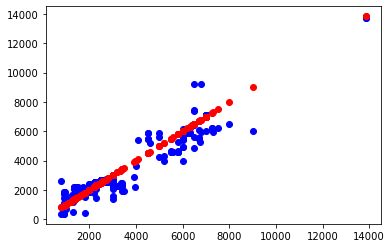

In [56]:
plt.scatter(mart_data.total_trip_cost_amount_in_tl,mart_predict,color='blue',label='Prediction')
plt.scatter(mart_data.total_trip_cost_amount_in_tl,mart_data.total_trip_cost_amount_in_tl,color='red',label='Perfect prediction')

In [57]:
metrics.mean_absolute_error(mart_data.total_trip_cost_amount_in_tl, mart_predict)

411.46585203228574

In [58]:
mart_predict = pd.DataFrame(mart_predict)
mart_data.total_trip_cost_amount_in_tl,mart_predict

(id
 06KGX4F3    7000.0
 06OXNBN0    2350.0
 08WH8WLP    2400.0
 08XFCSA4    2600.0
 0A2OCHU5    2500.0
              ...  
 Z6M54G3W    1450.0
 ZE9K9XL5    6750.0
 ZF0KY8KM    1500.0
 ZRQPTNI7    6300.0
 ZY2K6IS4    6300.0
 Name: total_trip_cost_amount_in_tl, Length: 330, dtype: float64,
                0
 0    7139.843750
 1    2535.830322
 2    2535.830322
 3    2640.524658
 4    2640.524658
 ..           ...
 325  2027.085938
 326  5241.561523
 327  1723.754639
 328  6198.472656
 329  5877.166016
 
 [330 rows x 1 columns])

In [59]:
differances = []
predict_mart = []
for i in range(330):
    differances.append(mart_predict.iloc[i:i+1]- mart_data.total_trip_cost_amount_in_tl.iloc[i])
    predict_mart.append(mart_predict.iloc[i:i+1])
    i += 1
differances

[           0
 0  139.84375,
             0
 1  185.830322,
             0
 2  135.830322,
            0
 3  40.524658,
             0
 4  140.524658,
             0
 5  921.480835,
            0
 6 -16.553345,
             0
 7 -489.504639,
             0
 8  265.673584,
             0
 9  265.673584,
              0
 10 -359.475342,
              0
 11  135.830322,
               0
 12 -1025.884277,
               0
 13 -1504.558105,
             0
 14  35.830322,
              0
 15  212.532349,
             0
 16  40.524658,
               0
 17 -1415.615723,
               0
 18 -1128.112305,
              0
 19  265.673584,
             0
 20 -38.577148,
             0
 21  139.84375,
              0
 22  421.252441,
             0
 23  35.830322,
              0
 24 -951.940186,
             0
 25  40.524658,
              0
 26 -437.983887,
              0
 27  140.524658,
              0
 28  449.687012,
              0
 29  856.317627,
              0
 30 -264.169678,
       

In [60]:
in_one_mse= []
for i in range(330):
    in_one_mse.append(differances[i]**2 < metrics.mean_squared_error(mart_data.total_trip_cost_amount_in_tl, mart_predict))
    i = i+ 1

In [61]:
between_one_three_mse = []
for i in range(330):
    between_one_three_mse.append((differances[i]**2 > (metrics.mean_squared_error(mart_data.total_trip_cost_amount_in_tl, mart_predict))) & (differances[i]**2 < 3*metrics.mean_squared_error(mart_data.total_trip_cost_amount_in_tl,mart_predict)))
    i = i+ 1

In [62]:
more_than_three_mse = []
for i in range(330):
    more_than_three_mse.append(differances[i]**2 > 3*(metrics.mean_squared_error(mart_data.total_trip_cost_amount_in_tl, mart_predict)))
    i = i+ 1

In [63]:
final = pd.DataFrame()
final['total_cost'] = mart_data.total_trip_cost_amount_in_tl
final['mart_predict'] = predict_mart
final['differances'] = differances
final['in_one_mse'] = in_one_mse
final['between_one_three_mse'] = between_one_three_mse
final['more_than_three_mse'] = more_than_three_mse
final

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
06KGX4F3,7000.0,0 0 7139.84375,0 0 139.84375,0 0 True,0 0 False,0 0 False
06OXNBN0,2350.0,0 1 2535.830322,0 1 185.830322,0 1 True,0 1 False,0 1 False
08WH8WLP,2400.0,0 2 2535.830322,0 2 135.830322,0 2 True,0 2 False,0 2 False
08XFCSA4,2600.0,0 3 2640.524658,0 3 40.524658,0 3 True,0 3 False,0 3 False
0A2OCHU5,2500.0,0 4 2640.524658,0 4 140.524658,0 4 True,0 4 False,0 4 False
...,...,...,...,...,...,...
Z6M54G3W,1450.0,0 325 2027.085938,0 325 577.085938,0 325 True,0 325 False,0 325 False
ZE9K9XL5,6750.0,0 326 5241.561523,0 326 -1508.438477,0 326 False,0 326 False,0 326 True
ZF0KY8KM,1500.0,0 327 1723.754639,0 327 223.754639,0 327 True,0 327 False,0 327 False


In [64]:
final['more_than_three_mse'] = final['more_than_three_mse'].astype(str).str[-5:]
final['in_one_mse'] = final['in_one_mse'].astype(str).str[-5:]
final['between_one_three_mse'] = final['between_one_three_mse'].astype(str).str[-5:]
final

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
06KGX4F3,7000.0,0 0 7139.84375,0 0 139.84375,True,False,False
06OXNBN0,2350.0,0 1 2535.830322,0 1 185.830322,True,False,False
08WH8WLP,2400.0,0 2 2535.830322,0 2 135.830322,True,False,False
08XFCSA4,2600.0,0 3 2640.524658,0 3 40.524658,True,False,False
0A2OCHU5,2500.0,0 4 2640.524658,0 4 140.524658,True,False,False
...,...,...,...,...,...,...
Z6M54G3W,1450.0,0 325 2027.085938,0 325 577.085938,True,False,False
ZE9K9XL5,6750.0,0 326 5241.561523,0 326 -1508.438477,False,False,True
ZF0KY8KM,1500.0,0 327 1723.754639,0 327 223.754639,True,False,False


In [65]:
final_more_than_three_mse = final[final['more_than_three_mse'] == ' True']
final_more_than_three_mse

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
0V2L088U,8000.0,0 13 6495.441895,0 13 -1504.558105,False,False,True
17TJOI8M,3000.0,0 17 1584.384277,0 17 -1415.615723,False,False,True
1CCA2KVH,3400.0,0 18 2271.887695,0 18 -1128.112305,False,False,True
4FSPAFMY,7500.0,0 42 6216.311035,0 42 -1283.688965,False,False,True
715EAVVN,3400.0,0 64 1923.258545,0 64 -1476.741455,False,False,True
8AO17CTH,6700.0,0 85 5556.331543,0 85 -1143.668457,False,False,True
8SUSDXQ3,4500.0,0 90 5875.27832,0 90 1375.27832,False,False,True
9D3DYGNU,800.0,0 93 2598.411133,0 93 1798.411133,False,False,True
CWZOG53X,6800.0,0 110 9218.230469,0 110 2418.230469,False,False,True


In [66]:
final_more_than_three_mse.shape

(30, 6)

In [67]:
final_between_one_three_mse = final[final['between_one_three_mse'] == ' True']
final_between_one_three_mse

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
0AU9UY0P,900.0,0 5 1821.480835,0 5 921.480835,False,True,False
0UGJJH6O,3900.0,0 12 2874.115723,0 12 -1025.884277,False,True,False
1ZHPOX8J,3400.0,0 24 2448.059814,0 24 -951.940186,False,True,False
28B4ENRX,1350.0,0 29 2206.317627,0 29 856.317627,False,True,False
66SZRSCN,5000.0,0 53 4216.513672,0 53 -783.486328,False,True,False
6ATYAZK8,3400.0,0 55 2363.029785,0 55 -1036.970215,False,True,False
6MHOIINL,7250.0,0 56 6198.472656,0 56 -1051.527344,False,True,False
6TP7ICG3,1350.0,0 59 2206.317627,0 59 856.317627,False,True,False
6Z9WP73Y,1500.0,0 63 2189.894775,0 63 689.894775,False,True,False


In [68]:
final_between_one_three_mse.shape

(43, 6)

In [69]:
final_in_one_mse= final[final['in_one_mse'] == ' True']
final_in_one_mse

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
06KGX4F3,7000.0,0 0 7139.84375,0 0 139.84375,True,False,False
06OXNBN0,2350.0,0 1 2535.830322,0 1 185.830322,True,False,False
08WH8WLP,2400.0,0 2 2535.830322,0 2 135.830322,True,False,False
08XFCSA4,2600.0,0 3 2640.524658,0 3 40.524658,True,False,False
0A2OCHU5,2500.0,0 4 2640.524658,0 4 140.524658,True,False,False
...,...,...,...,...,...,...
Z5SAU3M4,13850.0,0 324 13703.124023,0 324 -146.875977,True,False,False
Z6M54G3W,1450.0,0 325 2027.085938,0 325 577.085938,True,False,False
ZF0KY8KM,1500.0,0 327 1723.754639,0 327 223.754639,True,False,False


In [70]:
final_in_one_mse.shape

(257, 6)

In [71]:
metrics.mean_squared_error(mart_data.total_trip_cost_amount_in_tl, mart_predict)**(1/2)

619.3131396617894

In [72]:
three_mse_shipments = []
for i in final_more_than_three_mse.index:
    three_mse_shipments.append(orj_mart_data.loc[i])
three_mse_shipments = pd.DataFrame(three_mse_shipments)
three_mse_shipments = pd.concat([three_mse_shipments['latest_status'],three_mse_shipments['totalkgds'],three_mse_shipments['pickup_city'],three_mse_shipments['dropoff_city'] ,three_mse_shipments['pickup_address_type'], three_mse_shipments['dropoff_address_type'],
                  three_mse_shipments['category'], three_mse_shipments['price_type'], 
                  three_mse_shipments['shipment_type'], three_mse_shipments['vehicle_type'],three_mse_shipments['vehicle_body_type'],
                  three_mse_shipments['vehicle_package_type'], three_mse_shipments['vehicle_way_of_loading'],
                  three_mse_shipments['vehicle_tonnage_per_vehicle'],three_mse_shipments['payment_option'],
                  three_mse_shipments['invoice_type'], three_mse_shipments['tenant_signup_flow'], 
                  three_mse_shipments['total_cost_amount_in_tl'], three_mse_shipments['usd_tl'],
                  three_mse_shipments['price_base_amount_in_tl']
                 ,three_mse_shipments['routes'],three_mse_shipments['km'],three_mse_shipments['kursunsuz_v_max'],three_mse_shipments['pro_dizel']], axis = 1)
three_mse_shipments
three_mse_shipments = three_mse_shipments.drop(columns = 'shipment_type')
three_mse_shipments = three_mse_shipments.drop(columns = 'latest_status')
three_mse_shipments = three_mse_shipments.drop(columns = 'price_base_amount_in_tl')
three_mse_shipments = three_mse_shipments.drop(columns = 'price_type')
three_mse_shipments = three_mse_shipments.drop(columns = 'payment_option')
three_mse_shipments = three_mse_shipments.drop(columns = 'invoice_type')
three_mse_shipments = three_mse_shipments.drop(columns = 'tenant_signup_flow')
three_mse_shipments = three_mse_shipments.drop(columns = drops)

pd.concat([three_mse_shipments,final_more_than_three_mse.mart_predict,final_more_than_three_mse.differances],axis= 1)

,totalkgds,vehicle_body_type,vehicle_package_type,total_cost_amount_in_tl,km,kursunsuz_v_max,mart_predict,differances
0V2L088U,7000.0,TAUTLINER,NaN,8000.0,479.0,20.35,0 13 6495.441895,0 13 -1504.558105
17TJOI8M,4000.0,TAUTLINER,NaN,3000.0,103.9,17.98,0 17 1584.384277,0 17 -1415.615723
1CCA2KVH,25084.0,TAUTLINER,PALLET,3400.0,94.1,20.35,0 18 2271.887695,0 18 -1128.112305
4FSPAFMY,10000.0,TAUTLINER,PALLET,7500.0,479.0,20.35,0 42 6216.311035,0 42 -1283.688965
715EAVVN,15247.0,TAUTLINER,PALLET,3400.0,94.1,20.38,0 64 1923.258545,0 64 -1476.741455
8AO17CTH,25096.0,TAUTLINER,PALLET,6700.0,461.8,20.38,0 85 5556.331543,0 85 -1143.668457
8SUSDXQ3,5000.0,TAUTLINER,OTHER,4500.0,461.8,20.35,0 90 5875.27832,0 90 1375.27832
9D3DYGNU,26000.0,TAUTLINER,NaN,800.0,94.1,20.35,0 93 2598.411133,0 93 1798.411133
CWZOG53X,25000.0,FLATBED,OTHER,6800.0,665.9,20.35,0 110 9218.230469,0 110 2418.230469
DF48EDU7,24764.0,TAUTLINER,PALLET,6500.0,461.8,17.98,0 115 4842.289551,0 115 -1657.710449


In [73]:
pd.concat([three_mse_shipments,final_more_than_three_mse.mart_predict,final_more_than_three_mse.differances],axis= 1).shape

(30, 8)

In [74]:
two_mse_shipments = []
for i in final_between_one_three_mse.index:
    two_mse_shipments.append(orj_mart_data.loc[i])
two_mse_shipments = pd.DataFrame(two_mse_shipments)
two_mse_shipments = pd.concat([two_mse_shipments['latest_status'],two_mse_shipments['totalkgds'],two_mse_shipments['pickup_city'],two_mse_shipments['dropoff_city'] ,two_mse_shipments['pickup_address_type'], two_mse_shipments['dropoff_address_type'],
                  two_mse_shipments['category'], two_mse_shipments['price_type'], 
                  two_mse_shipments['shipment_type'], two_mse_shipments['vehicle_type'],two_mse_shipments['vehicle_body_type'],
                  two_mse_shipments['vehicle_package_type'], two_mse_shipments['vehicle_way_of_loading'],
                  two_mse_shipments['vehicle_tonnage_per_vehicle'],two_mse_shipments['payment_option'],
                  two_mse_shipments['invoice_type'], two_mse_shipments['tenant_signup_flow'], 
                  two_mse_shipments['total_trip_cost_amount_in_tl'], two_mse_shipments['usd_tl'],
                  two_mse_shipments['price_base_amount_in_tl']
                 ,two_mse_shipments['routes'],two_mse_shipments['km'],two_mse_shipments['kursunsuz_v_max'],two_mse_shipments['pro_dizel']], axis = 1)
two_mse_shipments
two_mse_shipments = two_mse_shipments.drop(columns = 'shipment_type')
two_mse_shipments = two_mse_shipments.drop(columns = 'latest_status')
two_mse_shipments = two_mse_shipments.drop(columns = 'price_base_amount_in_tl')
two_mse_shipments = two_mse_shipments.drop(columns = 'price_type')
two_mse_shipments = two_mse_shipments.drop(columns = 'payment_option')
two_mse_shipments = two_mse_shipments.drop(columns = 'invoice_type')
two_mse_shipments = two_mse_shipments.drop(columns = 'tenant_signup_flow')
two_mse_shipments = two_mse_shipments.drop(columns = drops)

pd.concat([two_mse_shipments,final_between_one_three_mse.mart_predict,final_between_one_three_mse.differances],axis= 1)


,totalkgds,vehicle_body_type,vehicle_package_type,total_trip_cost_amount_in_tl,km,kursunsuz_v_max,mart_predict,differances
0AU9UY0P,12000.0,TAUTLINER,PALLET,900.0,94.1,17.42,0 5 1821.480835,0 5 921.480835
0UGJJH6O,20000.0,FLATBED,OTHER,3900.0,132.4,19.27,0 12 2874.115723,0 12 -1025.884277
1ZHPOX8J,21228.0,TAUTLINER,PALLET,3400.0,94.1,20.35,0 24 2448.059814,0 24 -951.940186
28B4ENRX,22000.0,TAUTLINER,PALLET,1350.0,1.0,17.42,0 29 2206.317627,0 29 856.317627
66SZRSCN,25000.0,FLATBED,OTHER,5000.0,153.3,16.53,0 53 4216.513672,0 53 -783.486328
6ATYAZK8,23584.0,TAUTLINER,PALLET,3400.0,94.1,20.35,0 55 2363.029785,0 55 -1036.970215
6MHOIINL,10000.0,TAUTLINER,PALLET,7250.0,479.0,20.38,0 56 6198.472656,0 56 -1051.527344
6TP7ICG3,21636.0,TAUTLINER,PALLET,1350.0,1.0,17.98,0 59 2206.317627,0 59 856.317627
6Z9WP73Y,24576.0,TAUTLINER,PALLET,1500.0,1.0,20.35,0 63 2189.894775,0 63 689.894775
729K733D,21700.0,TAUTLINER,PALLET,3350.0,94.1,16.53,0 66 2494.356445,0 66 -855.643555


In [75]:
pd.concat([two_mse_shipments,final_between_one_three_mse.mart_predict,final_between_one_three_mse.differances],axis= 1).shape

(43, 8)

In [76]:
reason_data = orj_data.groupby('id').max()
reason_data = pd.DataFrame(reason_data)
reason_data = pd.concat([reason_data['latest_status'],reason_data['totalkgds'],reason_data['pickup_city'],reason_data['dropoff_city'] ,reason_data['pickup_address_type'], reason_data['dropoff_address_type'],
                  reason_data['category'], reason_data['price_type'], 
                  reason_data['shipment_type'], reason_data['vehicle_type'],reason_data['vehicle_body_type'],
                  reason_data['vehicle_package_type'], reason_data['vehicle_way_of_loading'],
                  reason_data['vehicle_tonnage_per_vehicle'],reason_data['payment_option'],
                  reason_data['invoice_type'], reason_data['tenant_signup_flow'], 
                  reason_data['total_trip_cost_amount_in_tl'], reason_data['usd_tl'],
                  reason_data['price_base_amount_in_tl']
                 ,reason_data['routes'],reason_data['km'],reason_data['kursunsuz_v_max'],reason_data['pro_dizel']], axis = 1)
reason_data
reason_data = reason_data.drop(columns = 'shipment_type')
reason_data = reason_data.drop(columns = 'latest_status')
reason_data = reason_data.drop(columns = 'price_base_amount_in_tl')
reason_data = reason_data.drop(columns = 'price_type')
reason_data = reason_data.drop(columns = 'payment_option')
reason_data = reason_data.drop(columns = 'invoice_type')
reason_data = reason_data.drop(columns = 'tenant_signup_flow')
reason_data

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_trip_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,
001KRWIU,24750.0,İstanbul,İzmir,OTHER,FACTORY,RAW,SEMI_TRUCK,FLATBED,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,24.750,3000.0,8.6294,İstanbul_İzmir,479.0,7.74,7.22
00GH3XCL,25000.0,Kocaeli,Erzurum,WAREHOUSE,WAREHOUSE,HEALTH,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.000,6000.0,8.5758,Kocaeli_Erzurum,1129.2,7.74,7.22
01CI81GX,16000.0,Sakarya,Kocaeli,FACTORY,SEAPORT,DRY_FOOD,SEMI_TRUCK,FLATBED,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,16.000,0.0,12.9620,Sakarya_Kocaeli,50.9,9.66,9.75
01ZHUJ4Y,26416.0,İzmir,Balıkesir,OTHER,FACTORY,AGRICULTURE,SEMI_TRUCK,FLATBED,OTHER,BY_HAND,26.416,0.0,8.6399,İzmir_Balıkesir,203.6,7.74,7.25
02YA8SG0,16000.0,Bursa,Bursa,FACTORY,SEAPORT,BUILD,SEMI_TRUCK,FLATBED,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,16.000,0.0,8.6505,Bursa_Bursa,1.0,7.76,7.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVM9HTSD,18000.0,Kocaeli,Kocaeli,WAREHOUSE,FACTORY,OTHER,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,18.000,1100.0,8.3379,Kocaeli_Kocaeli,1.0,7.74,7.25
ZW6TCGHN,25000.0,Bursa,İstanbul,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.000,4650.0,13.5644,Bursa_İstanbul,153.3,13.58,13.73
ZYIFCKMA,22000.0,Bursa,Kocaeli,OTHER,OTHER,OTHER,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,22.000,3000.0,13.7679,Bursa_Kocaeli,132.4,10.33,10.31


In [77]:
reason_data = reason_data[reason_data.routes == 'Bursa_Kocaeli']
reason_data = reason_data[reason_data.vehicle_body_type == 'FLATBED']
reason_data = reason_data[reason_data.vehicle_package_type == 'OTHER']
reason_data.sort_values(by = 'kursunsuz_v_max', ascending= False)

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_trip_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,
06VKW79O,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,2000.0,14.2580,Bursa_Kocaeli,132.4,16.77,17.00
0L1QW0KX,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,2500.0,14.2580,Bursa_Kocaeli,132.4,16.77,17.00
34M739R2,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,2000.0,14.2580,Bursa_Kocaeli,132.4,16.77,17.00
3TT41XI4,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,AGRICULTURE,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,2000.0,14.2580,Bursa_Kocaeli,132.4,16.77,17.00
UKROEDFZ,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,2000.0,14.2580,Bursa_Kocaeli,132.4,16.77,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPAMYVYS,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,1350.0,8.3840,Bursa_Kocaeli,132.4,7.73,7.21
57V40PBZ,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,1200.0,8.3840,Bursa_Kocaeli,132.4,7.73,7.21
654LFVO1,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,1350.0,8.3840,Bursa_Kocaeli,132.4,7.73,7.21


In [78]:
pd.set_option('display.max_rows', 500)